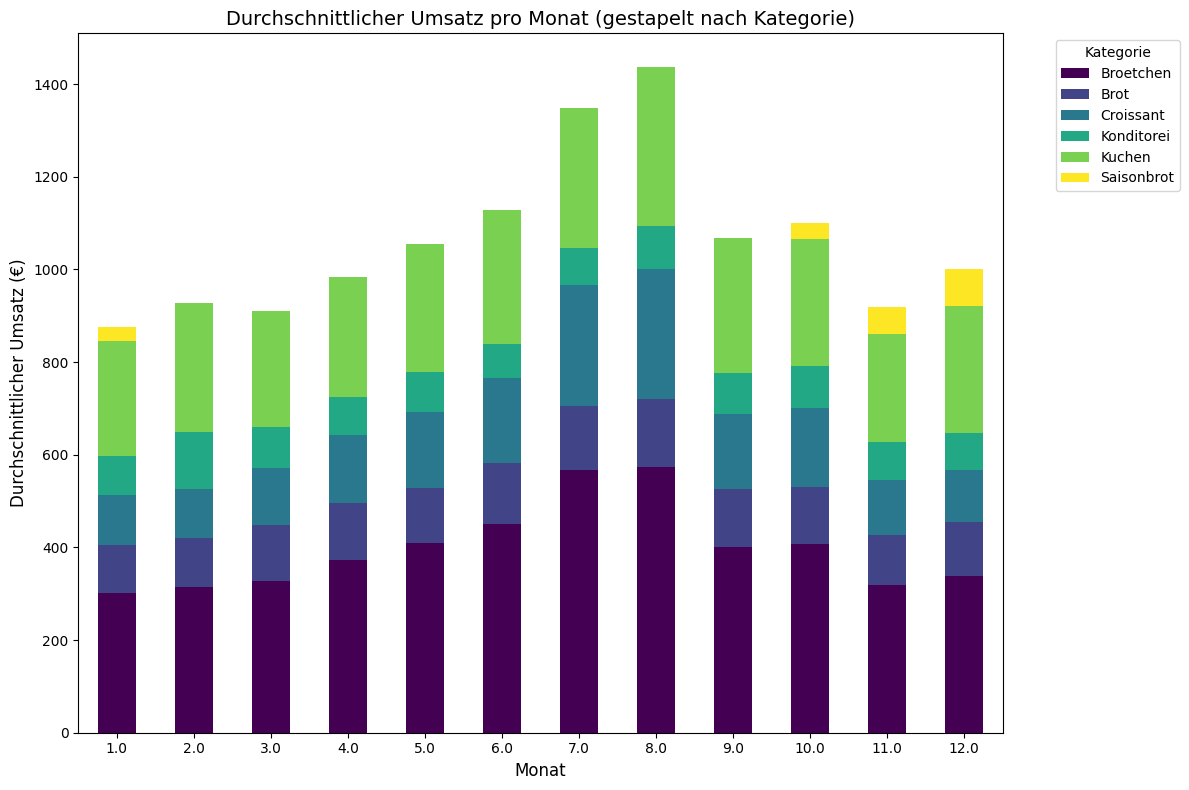

In [ ]:
# Umsatz pro Kategorie, nach Monat

import pandas as pd
import matplotlib.pyplot as plt

# Umsatzdaten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Umsatz pro Monat und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_kategorie = (
    umsatz_gesamt.groupby(['Monat', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Hier werden fehlende Werte durch 0 ersetzt
)

# Sicherstellen, dass alle Monate für jede Kategorie existieren (fill_value=0 bleibt)
umsatz_pro_kategorie = umsatz_pro_kategorie.fillna(0)

# Plot erstellen
umsatz_pro_kategorie.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),  # Größeres Diagramm
    colormap='viridis'  # Farbpalette
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Monat (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Monat) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


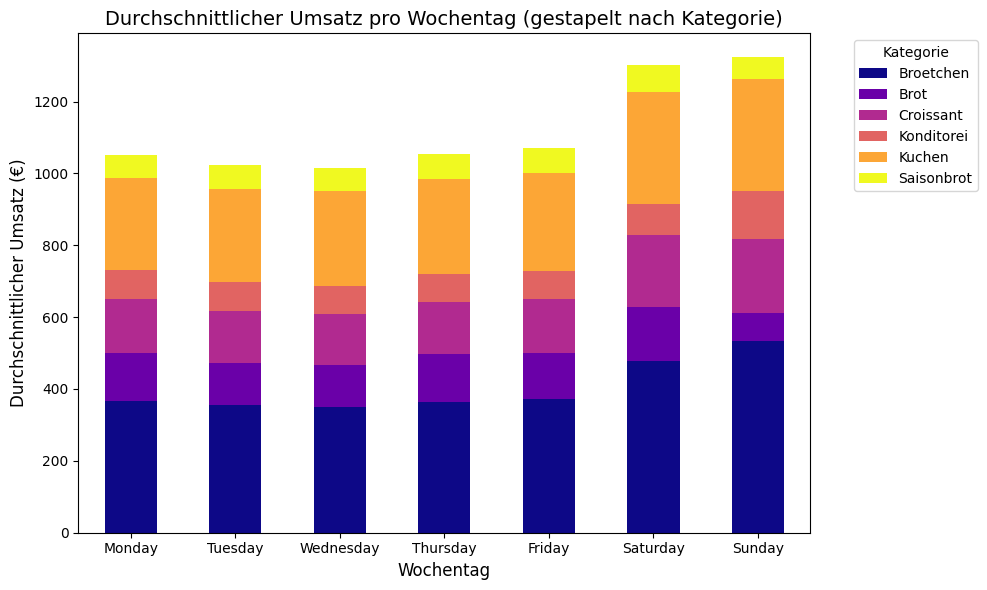

In [ ]:
# Umsatz pro Backwaren-Kategorie, nach Wochentag

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Umsatz pro Wochentag und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_wochentag = (
    umsatz_gesamt.groupby(['Wochentag', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Kategorien als Spalten
)

# Wochentage sortieren (falls nötig, je nach Sprache und Formatierung)
wochentage_sortiert = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
umsatz_pro_wochentag = umsatz_pro_wochentag.reindex(wochentage_sortiert)

# Plot erstellen
umsatz_pro_wochentag.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='plasma'  # Optionale Farbpalette
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Wochentag (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Wochentage) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


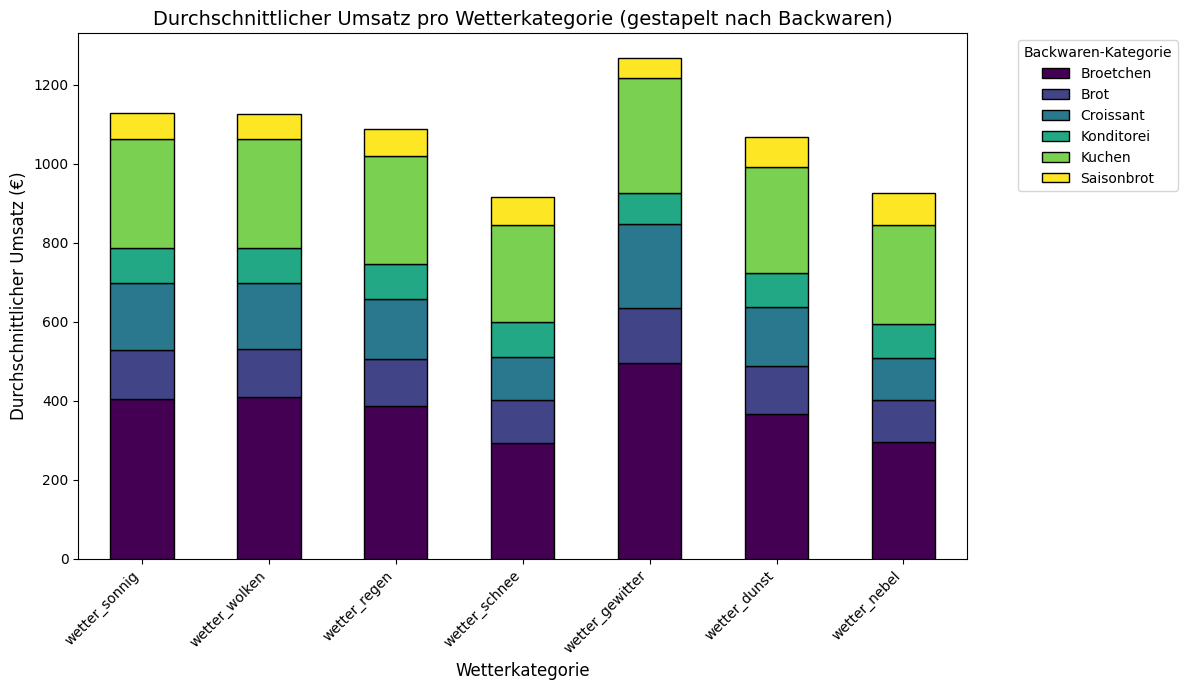

In [8]:
#Umsatz nach Wetterkategorie

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Wetterkategorien auswählen (Spalten, die mit "wetter_" beginnen)
wetterkategorien = [col for col in umsatz_gesamt.columns if col.startswith('wetter_')]

# Vorbereitung des DataFrames für die gestapelten Daten
umsatz_stacked = pd.DataFrame()

for wetter in wetterkategorien:
    # Filter für die Zeilen, bei denen das Wetter zutrifft
    gefiltert = umsatz_gesamt[umsatz_gesamt[wetter] == 1]
    
    # Durchschnittlicher Umsatz je Backwaren-Kategorie
    durchschnitt = gefiltert.groupby('Kategorie')['Umsatz'].mean()
    
    # Spalte mit dem Wetter hinzufügen
    durchschnitt.name = wetter
    
    # Zusammenführen
    umsatz_stacked = pd.concat([umsatz_stacked, durchschnitt], axis=1)

# Fehlende Werte mit 0 ersetzen
umsatz_stacked = umsatz_stacked.fillna(0).T  # Transponieren für Wetterkategorien auf der X-Achse

# Plot erstellen
umsatz_stacked.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis',  # Optionale Farbpalette
    edgecolor='black'
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Wetterkategorie (gestapelt nach Backwaren)', fontsize=14)
plt.xlabel('Wetterkategorie', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Wetterkategorien leicht schräg darstellen
plt.legend(title='Backwaren-Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


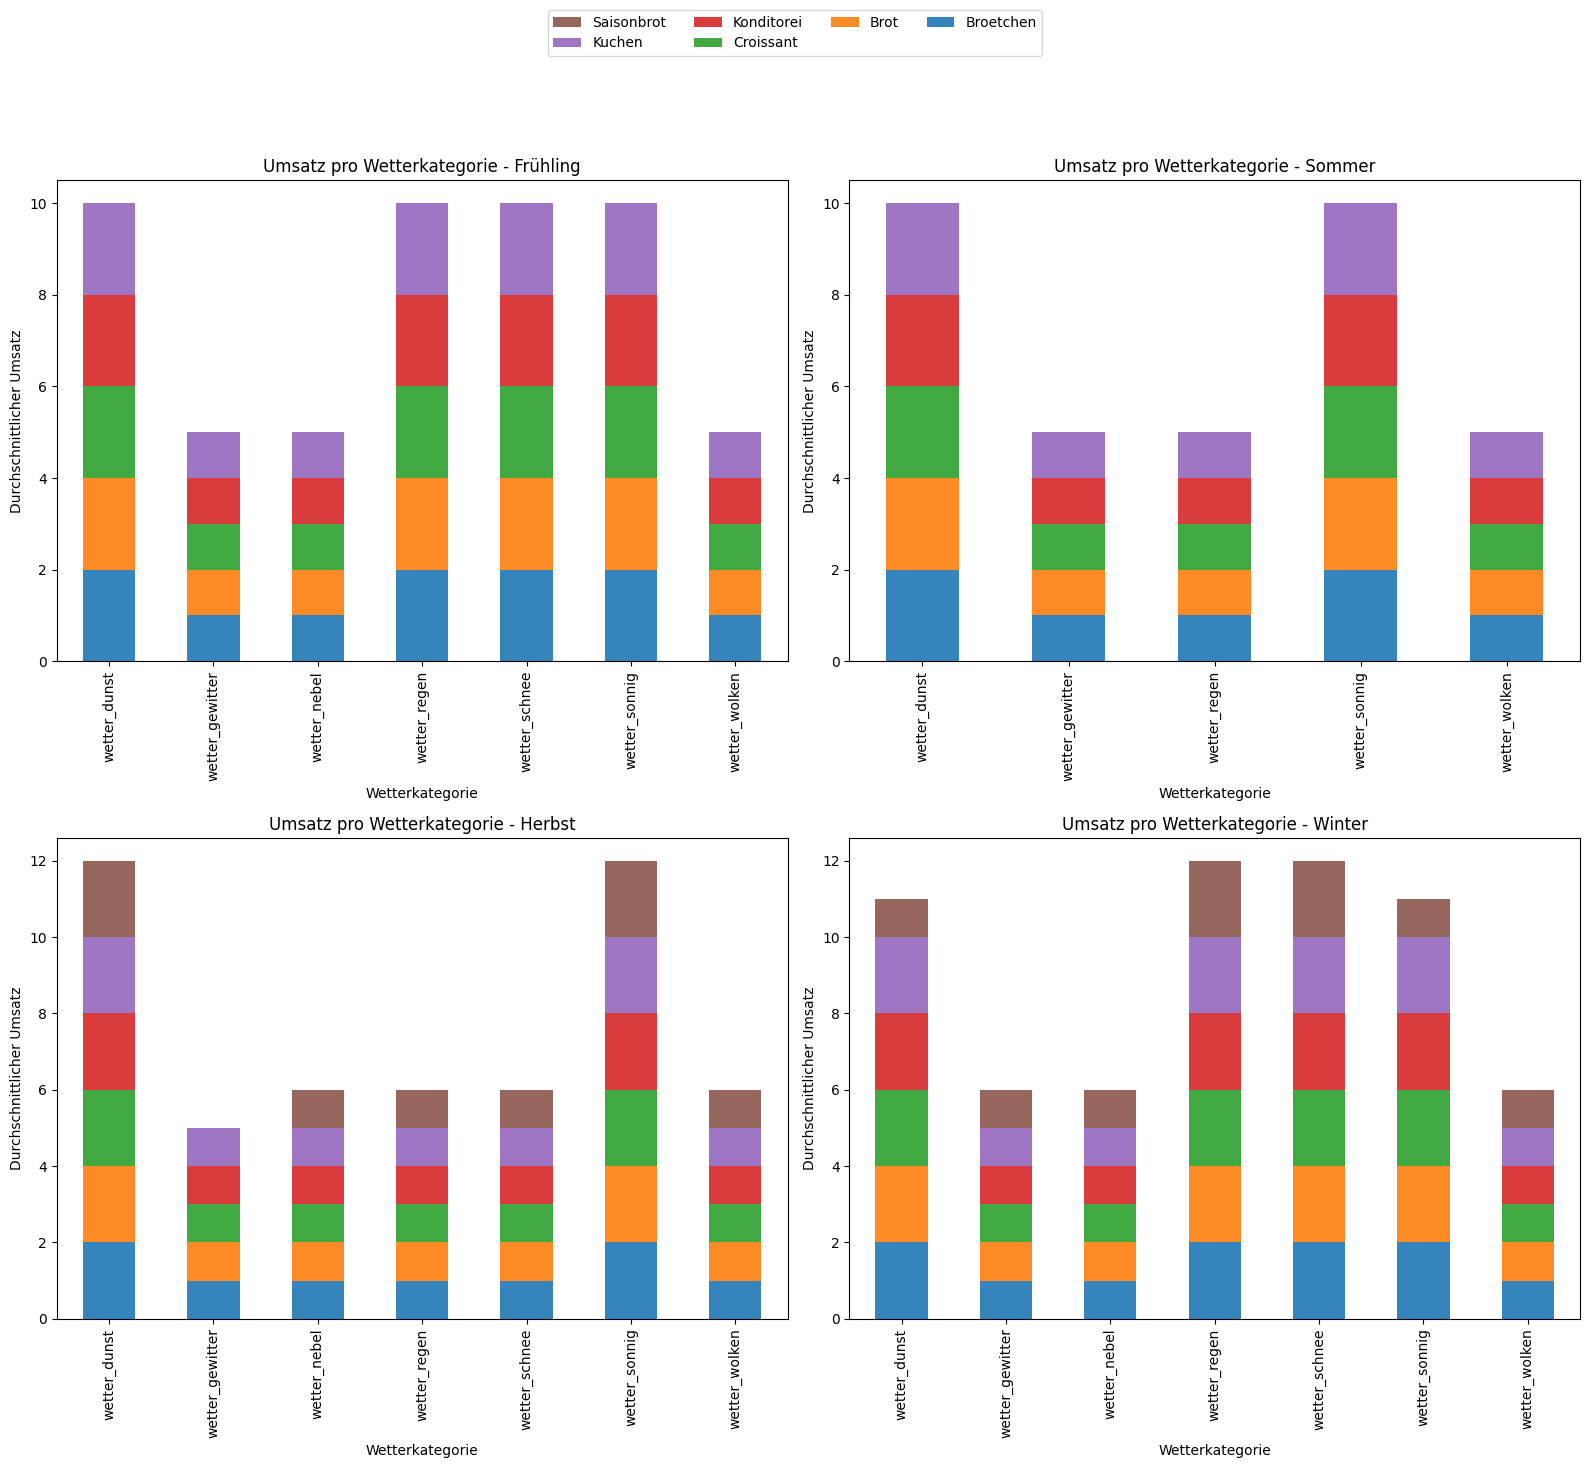

In [ ]:
#Umsatz pro Wetterkategorie, nach Jahreszeit

import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# NaN-Werte in der Monatsspalte entfernen
umsatz_gesamt = umsatz_gesamt.dropna(subset=['Monat'])

# Monat in Ganzzahlen konvertieren
umsatz_gesamt['Monat'] = umsatz_gesamt['Monat'].astype(int)

# Jahreszeit bestimmen
def get_jahreszeit(monat):
    if monat in [12, 1, 2]:
        return 'Winter'
    elif monat in [3, 4, 5]:
        return 'Frühling'
    elif monat in [6, 7, 8]:
        return 'Sommer'
    elif monat in [9, 10, 11]:
        return 'Herbst'

umsatz_gesamt['Jahreszeit'] = umsatz_gesamt['Monat'].apply(get_jahreszeit)

# Wetterkategorien definieren
wetter_cols = ['wetter_sonnig', 'wetter_wolken', 'wetter_regen', 'wetter_schnee', 'wetter_gewitter', 'wetter_dunst', 'wetter_nebel']

# Gruppieren nach Jahreszeit, Wetterkategorie und Backwaren-Kategorie
umsatz_gesamt_grouped = umsatz_gesamt.groupby(
    ['Jahreszeit'] + wetter_cols + ['Kategorie']
).Umsatz.mean().reset_index()

# Jahreszeiten definieren
jahreszeiten = ['Frühling', 'Sommer', 'Herbst', 'Winter']

# Erstelle die Subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))  # Größere Grafik
axes = axes.flatten()

# Definiere eine benutzerdefinierte Farbpalette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for i, jahreszeit in enumerate(jahreszeiten):
    ax = axes[i]
    
    # Daten für die aktuelle Jahreszeit filtern
    saison_data = umsatz_gesamt_grouped[umsatz_gesamt_grouped['Jahreszeit'] == jahreszeit]

    # Wetterkategorien und Umsatz zusammenfassen
    wetter_data = saison_data.melt(id_vars=['Jahreszeit', 'Kategorie'], 
                                   value_vars=wetter_cols, 
                                   var_name='Wetterkategorie', 
                                   value_name='Umsatz_Wert')  # 'Umsatz_Wert' als Wertname beibehalten

    # Nur Zeilen mit Umsatz größer als 0 beibehalten
    wetter_data = wetter_data[wetter_data['Umsatz_Wert'] > 0]

    # Pivot-Tabelle erstellen, um gestacktes Balkendiagramm zu erstellen
    pivot_data = wetter_data.pivot_table(index='Wetterkategorie', 
                                         columns='Kategorie', 
                                         values='Umsatz_Wert',  # 'Umsatz_Wert' als Wert beibehalten
                                         aggfunc='sum', 
                                         fill_value=0)

    # Plot erstellen mit benutzerdefinierter Farbpalette
    pivot_data.plot(kind='bar', stacked=True, ax=ax, color=color_palette, alpha=0.9)
    
    # Titel und Achsentitel setzen
    ax.set_title(f'Umsatz pro Wetterkategorie - {jahreszeit}', fontsize=12)
    ax.set_xlabel('Wetterkategorie', fontsize=10)
    ax.set_ylabel('Durchschnittlicher Umsatz', fontsize=10)
    
    # Entferne die Legende aus den Subplots
    ax.legend().remove()

# Eine einzige Legende außerhalb hinzufügen, und Reihenfolge der Legende umkehren
handles, labels = ax.get_legend_handles_labels()

# Umkehren der Reihenfolge der Legende
handles = handles[::-1]
labels = labels[::-1]

# Legende außerhalb hinzufügen
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), fontsize=10)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


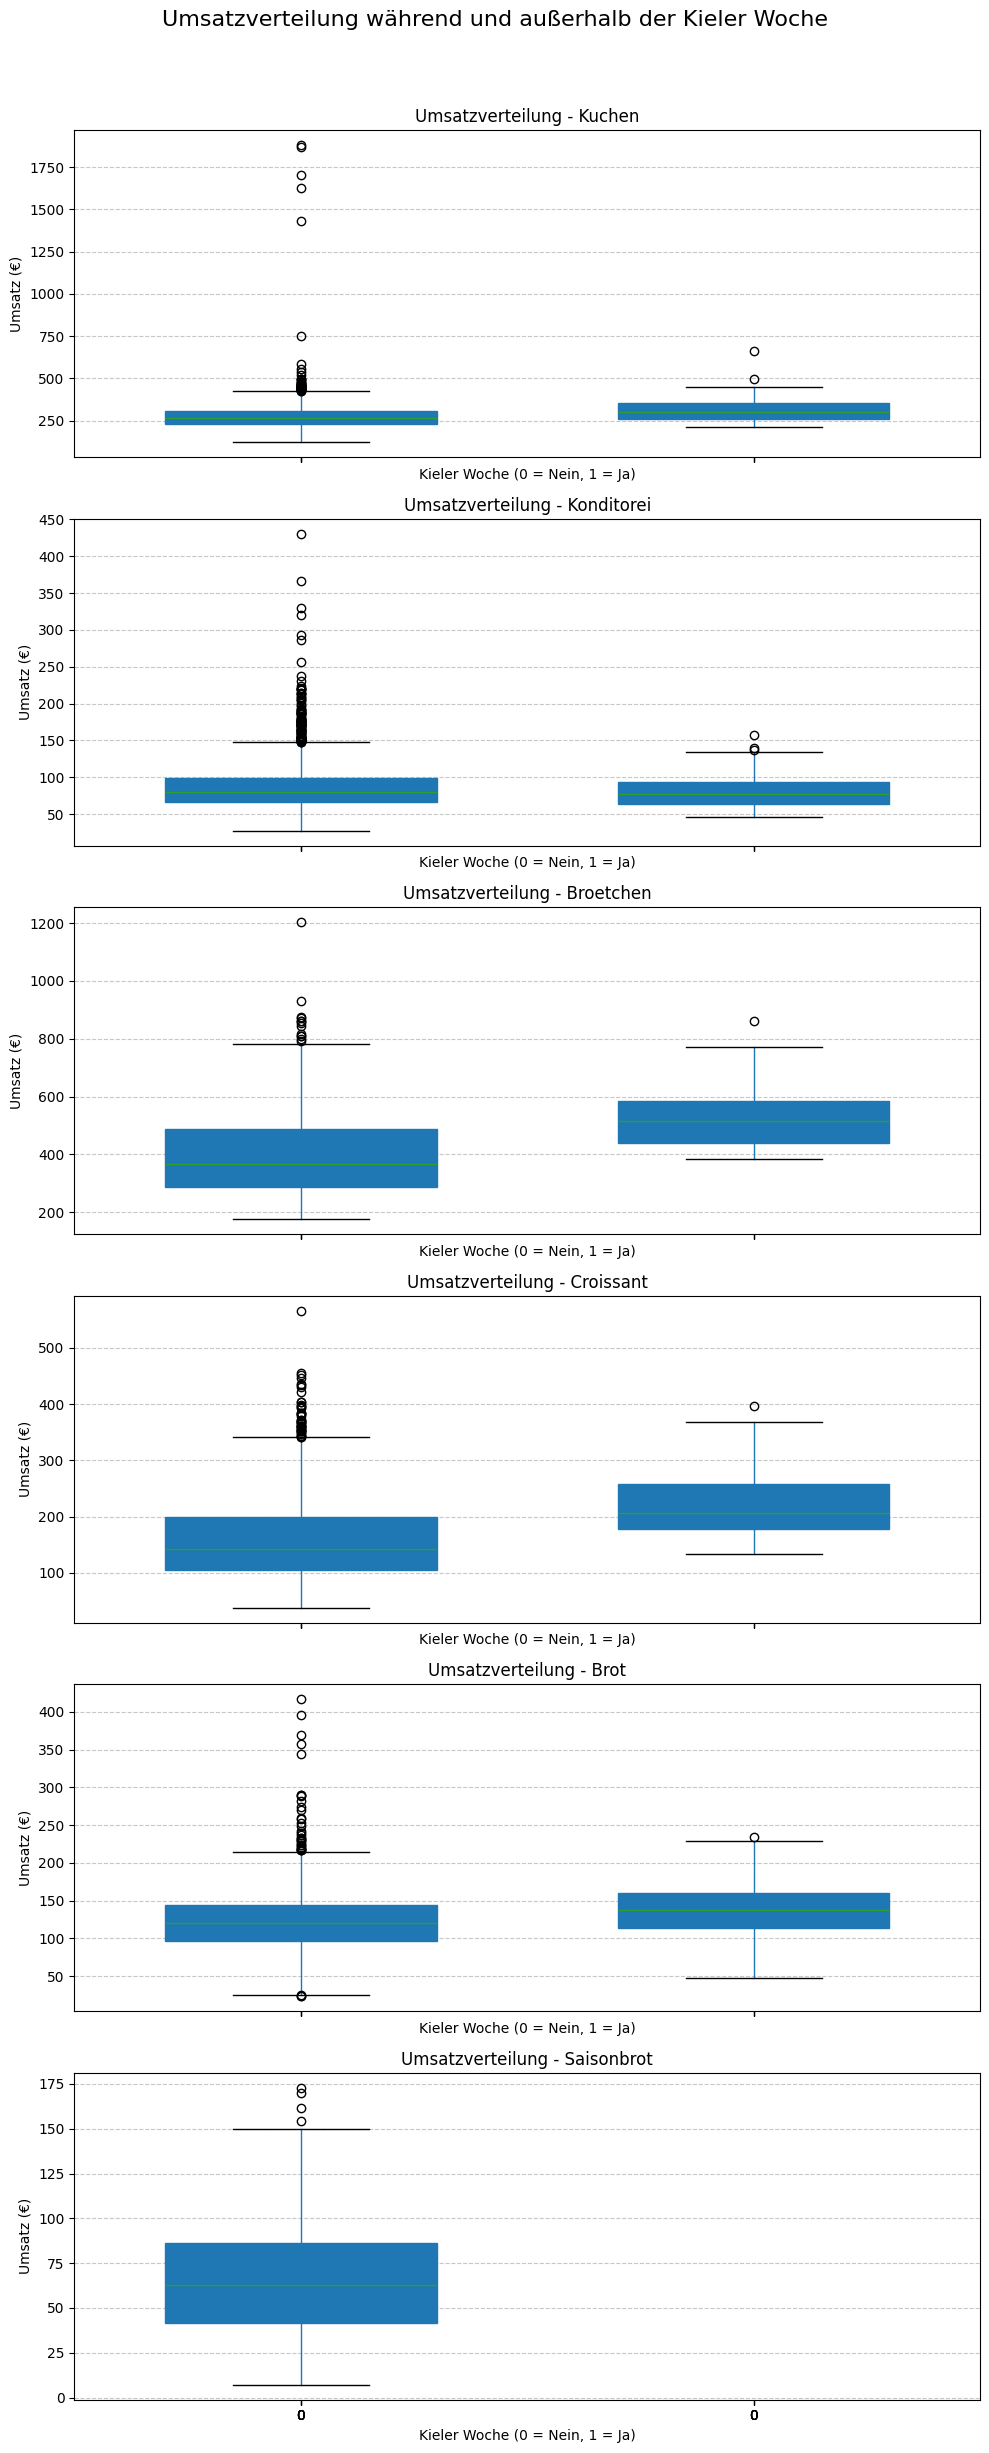

In [ ]:
#Boxplots mit durchschn. Umsatzwerten für jede Backwaren-Kategorie, während und außerhalb Kieler Woche

import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Daten vorbereiten
kategorien = umsatz_gesamt['Kategorie'].unique()  # Alle einzigartigen Kategorien abrufen

# Subplots erstellen
fig, axes = plt.subplots(len(kategorien), 1, figsize=(10, len(kategorien) * 4), sharex=True)

# Für jede Kategorie Boxplots erstellen
for i, kategorie in enumerate(kategorien):
    ax = axes[i]
    # Daten für die aktuelle Kategorie filtern
    kategorie_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == kategorie]

    # Boxplot erstellen: Umsatz getrennt nach Kieler Woche (0 und 1)
    kategorie_data.boxplot(
        column='Umsatz', 
        by='KielerWoche', 
        ax=ax, 
        grid=False, 
        widths=0.6, 
        patch_artist=True
    )
    
    # Achsentitel und Diagrammtitel setzen
    ax.set_title(f'Umsatzverteilung - {kategorie}', fontsize=12)
    ax.set_xlabel('Kieler Woche (0 = Nein, 1 = Ja)', fontsize=10)
    ax.set_ylabel('Umsatz (€)', fontsize=10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Übergeordneten Titel hinzufügen
plt.suptitle('Umsatzverteilung während und außerhalb der Kieler Woche', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


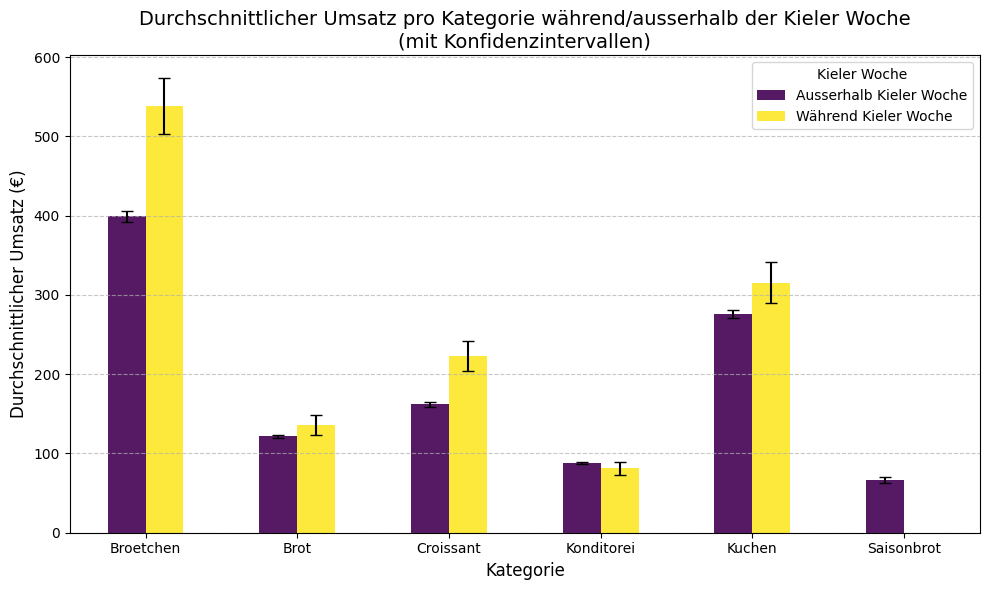

In [ ]:
#Balkendiagramm mit Konfidenzintervall zum Vergleich Umsatz pro Kategorie während/ außerhalb der Kieler Woche

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Funktion zur Berechnung des Konfidenzintervalls
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    if n == 0:
        return 0  # Kein Datenpunkt, keine Breite
    mean = np.mean(data)
    error = sem(data)  # Standardfehler
    margin = error * t.ppf((1 + confidence) / 2, n - 1)  # T-Wert für Konfidenzintervall
    return margin

# Umsatz pro Kategorie und Kieler Woche aggregieren
umsatz_grouped = umsatz_gesamt.groupby(['Kategorie', 'KielerWoche'])['Umsatz']

# Mittelwerte und Konfidenzintervalle berechnen
means = umsatz_grouped.mean().unstack()
conf_intervals = umsatz_grouped.apply(lambda x: calculate_confidence_interval(x)).unstack()

# Balkendiagramm mit Fehlerbalken
fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind='bar', yerr=conf_intervals, ax=ax, capsize=4, colormap='viridis', alpha=0.9)

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title('Durchschnittlicher Umsatz pro Kategorie während/ausserhalb der Kieler Woche\n(mit Konfidenzintervallen)', fontsize=14)
ax.set_xlabel('Kategorie', fontsize=12)
ax.set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
ax.legend(title='Kieler Woche', labels=['Ausserhalb Kieler Woche', 'Während Kieler Woche'], loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Layout anpassen
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


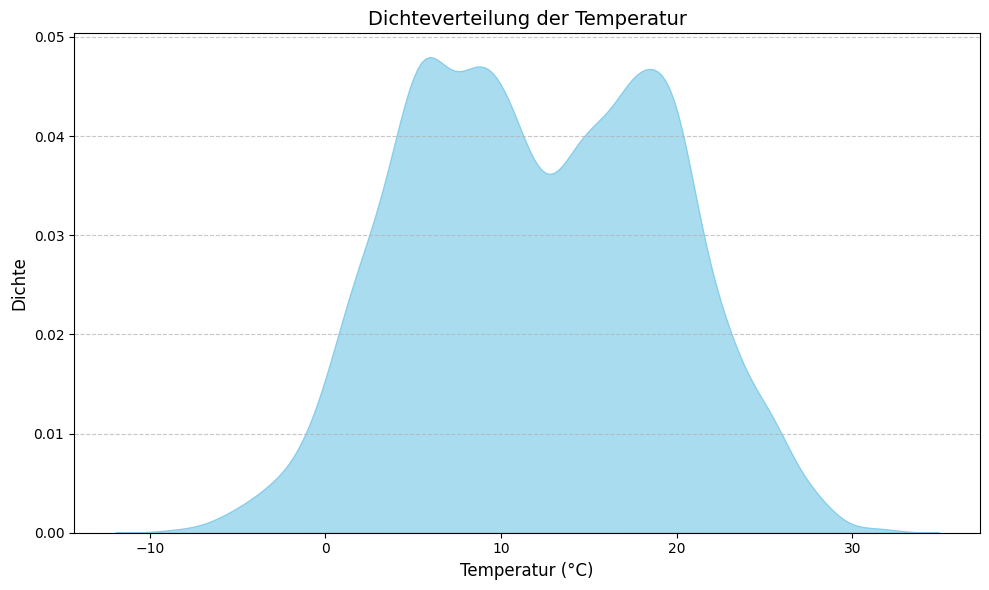

In [2]:
#Dichteverteilung der Temperatur, um zu entscheiden, was sinnvolle bins für die Temperatur sind

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Dichtediagramm der Temperatur
plt.figure(figsize=(10, 6))
sns.kdeplot(data=umsatz_gesamt, x='Temperatur', fill=True, color='skyblue', alpha=0.7)
plt.title('Dichteverteilung der Temperatur', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Dichte', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Temperatur_Bin
Kalt       4024
Moderat    3890
Warm       1404
Name: count, dtype: int64
        Datum  Warengruppe      Umsatz Wochentag   Kategorie  KielerWoche  \
0  2013-07-01          5.0  317.475875    Monday      Kuchen            0   
1  2013-07-01          4.0   65.890169    Monday  Konditorei            0   
2  2013-07-01          2.0  535.856285    Monday   Broetchen            0   
3  2013-07-01          3.0  201.198426    Monday   Croissant            0   
4  2013-07-01          1.0  148.828353    Monday        Brot            0   

   Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  Monat  \
0         6.0     17.8375                 15.0        20.0    7.0   
1         6.0     17.8375                 15.0        20.0    7.0   
2         6.0     17.8375                 15.0        20.0    7.0   
3         6.0     17.8375                 15.0        20.0    7.0   
4         6.0     17.8375                 15.0        20.0    7.0   

   wetter_sonnig  wetter_wolken  

/tmp/ipykernel_3026/2127208112.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_gesamt.groupby(['Temperatur_Bin', 'Kategorie'])['Umsatz']


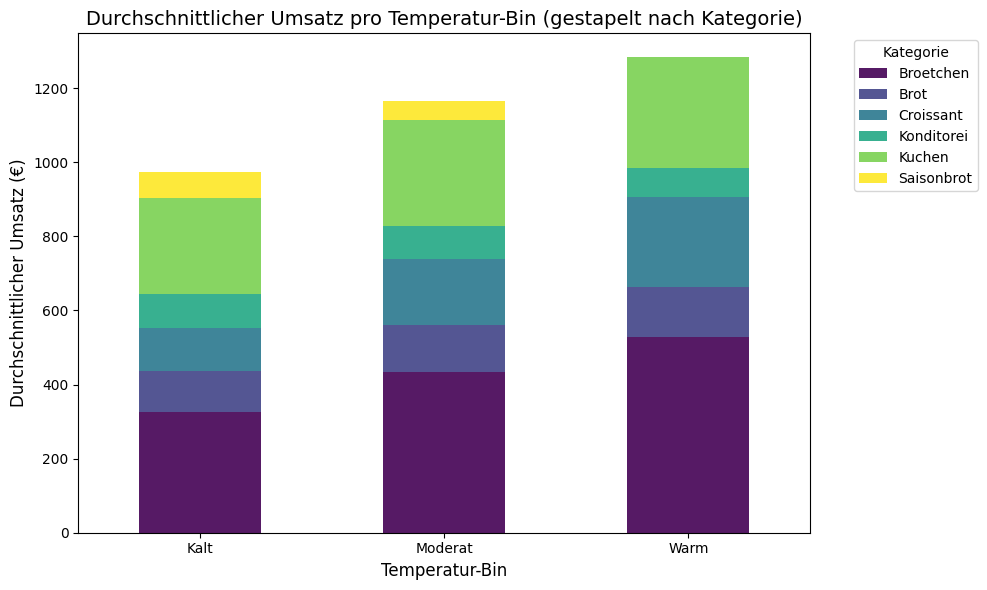

In [4]:
# Temperatur-Bins definieren und den Umsatz pro Temperatur-Bin darstellen
bins = [-10, 10, 20, 35]  
labels = ['Kalt', 'Moderat', 'Warm', ]

# Temperatur-Bins der Spalte hinzufügen
umsatz_gesamt['Temperatur_Bin'] = pd.cut(umsatz_gesamt['Temperatur'], bins=bins, labels=labels, include_lowest=True)

# Kontrolle der Verteilung in den Bins
print(umsatz_gesamt['Temperatur_Bin'].value_counts())

print(umsatz_gesamt.head())

# Daten aggregieren: Durchschnittlicher Umsatz pro Temperatur-Bin und Kategorie
umsatz_bins = (
    umsatz_gesamt.groupby(['Temperatur_Bin', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Kategorien als Spalten
)

# Gestapeltes Balkendiagramm erstellen
umsatz_bins.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis',  # Optionale Farbpalette
    alpha=0.9
)

# Diagramm formatieren
plt.title('Durchschnittlicher Umsatz pro Temperatur-Bin (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Temperatur-Bin', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Temperatur-Bin) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()

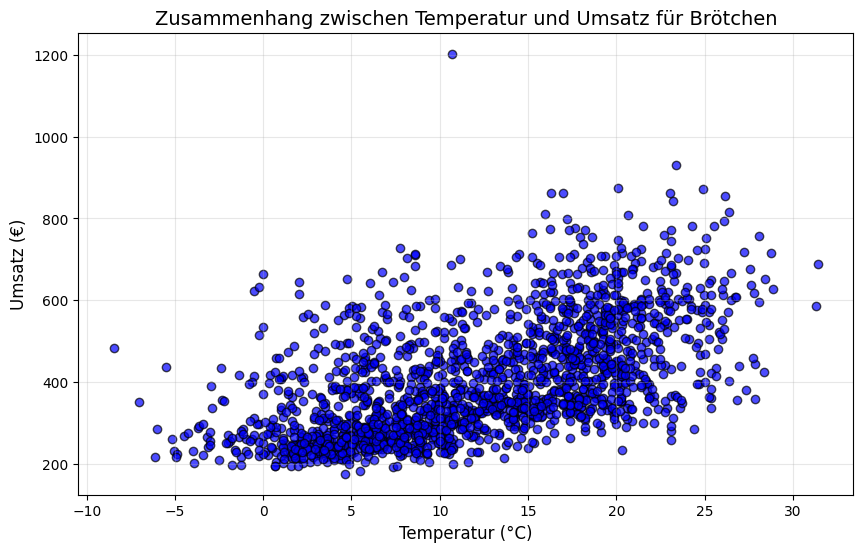

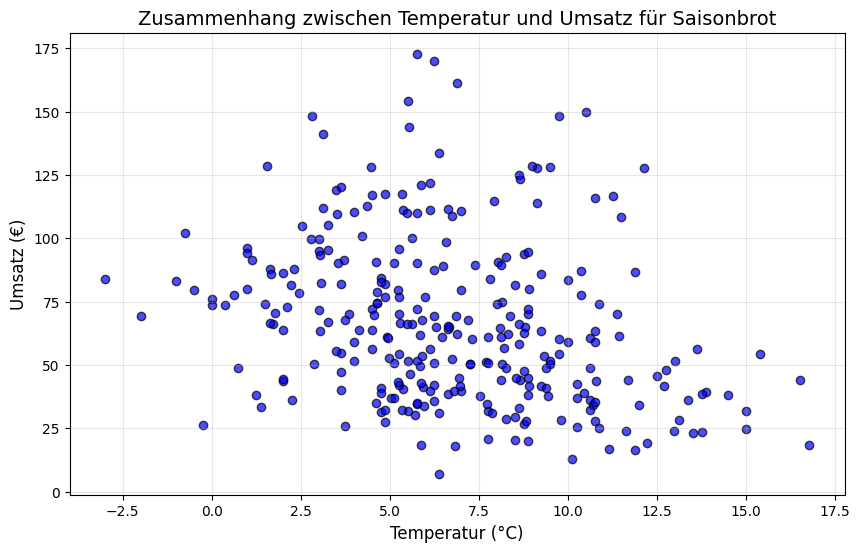

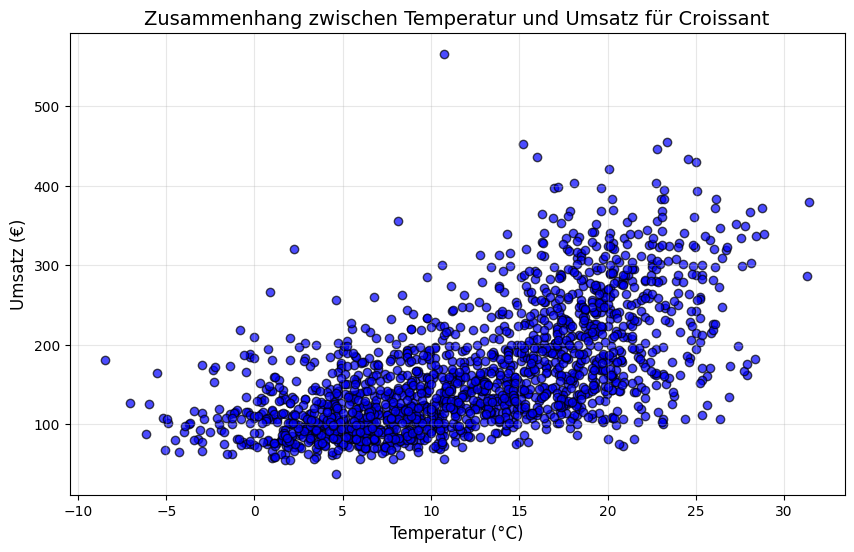

In [7]:
# Scatterplots erstellen zur Korrelation von Temperatur und Umsatz einzelner Backwaren

import matplotlib.pyplot as plt

# Daten filtern: Nur Brötchen aus der Kategorie auswählen
broetchen_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Broetchen']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(broetchen_data['Temperatur'], broetchen_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Brötchen', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()

# Daten filtern: Nur Saisonbrot aus der Kategorie auswählen
saisonbrot_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Saisonbrot']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(saisonbrot_data['Temperatur'], saisonbrot_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Saisonbrot', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()


# Daten filtern: Nur Croissant aus der Kategorie auswählen
croissant_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Croissant']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(croissant_data['Temperatur'], croissant_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Croissant', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()
